In [ ]:
# importing dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [85]:
# storing the csv file as dataframe using pandas 
data = pd.read_csv("mnist_data.csv")

In [86]:
# viewing column heads
data.head()

,label,Pixel 0,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,...,Pixel 774,Pixel 775,Pixel 776,Pixel 777,Pixel 778,Pixel 779,Pixel 780,Pixel 781,Pixel 782,Pixel 783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


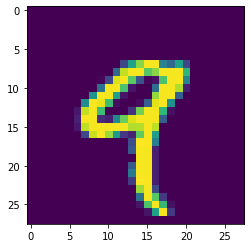

In [87]:
# extracting data and viewing it
a = data.iloc[4,1:].values

# reshaping the extracted data
a = a.reshape(28,28).astype('uint8')
plt.imshow(a)

In [88]:
# seperating labels and pixel/data values
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [89]:
# Creating test and train batches
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)
# test_size = 0.2 -> means the test data contains 20% of the original data and the reamaining is to train the rf clasifier
# random_state determines the randomness of picking the data

In [90]:
# checking the data
x_train.head() # has all data except labels

,Pixel 0,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 774,Pixel 775,Pixel 776,Pixel 777,Pixel 778,Pixel 779,Pixel 780,Pixel 781,Pixel 782,Pixel 783
20379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
y_train.head() # has labels only

20379    4
53032    4
27005    7
30510    8
508      1
Name: label, dtype: int64

In [92]:
# calling rf classifier
rf = RandomForestClassifier(n_estimators = 100)

In [93]:
# fitting the data
rf.fit(x_train, y_train) # training the model with x_train and y_train

RandomForestClassifier()

In [94]:
# prediction of test data
predictor = rf.predict(x_test)
predictor # this is the data predicted by the rf classifier and is checked with the actual labels present in y_test in next cell

array([2, 7, 6, ..., 6, 4, 2], dtype=int64)

In [96]:
# comparing the predicted data with the labels of them present in y_test and also finding the accuracy
s = y_test.values
count = 0
length = len(predictor)

# calculating the accuracy
for i in range(length):
    if s[i] == predictor[i]: # if the predicted value and the original value are same then the classifier predicted it correctly
        count += 1           # so increment the count value
print(count) # this is the no. of values that our classifier has predicted correctly
print("Accuracy =", count/length) # our classifier is 96% accurate

11626
Accuracy = 0.9688333333333333
